In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np

plt.style.use('ggplot')
# plots of BT only work with this following command
%matplotlib inline

## Retorno dos Ativos

/home/victormmp/.virtualenvs/rl_mestrado/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


<AxesSubplot:>

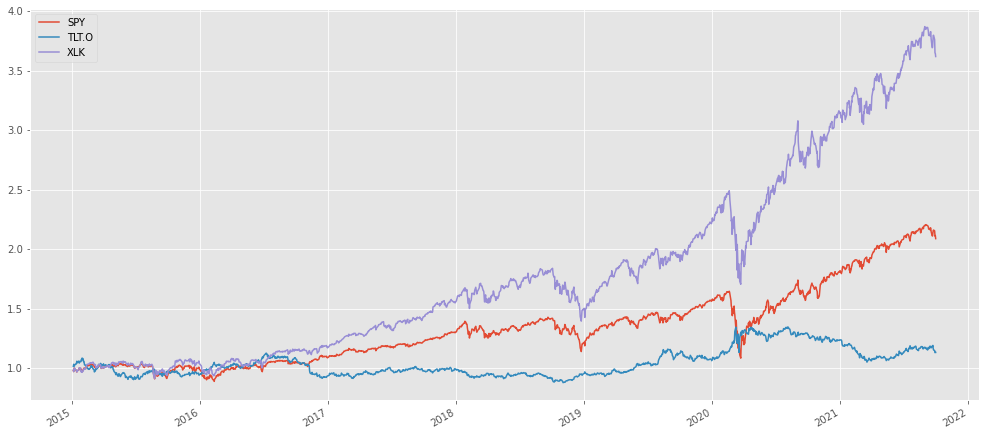

In [2]:
import os
DATA_PATH = os.path.join('..', 'silver', 'daily_feature_set.csv')
NAME_SUFFIX = "daily_v2"
ASSETS = ['SPY', 'TLT.O', 'XLK']
START_OUT_SAMPLE = '2015-01-05'
END_OUT_SAMPLE = '2021-09-30'

#=======================================================| TRAIN

data = pd.read_csv(DATA_PATH, parse_dates=True, index_col=0)
data = data.loc[(~data['TLT.O_logReturns'].isnull()) | (~data['TAIL.K_logReturns'].isnull())]
data.fillna(0, inplace=True)

start_out_samp = pd.Timestamp(START_OUT_SAMPLE)
end_out_samp = pd.Timestamp(END_OUT_SAMPLE)

df_out_sample = data.loc[start_out_samp:end_out_samp, :]


df_out_sample.loc[:,'XLK_cumsum'] = df_out_sample[['XLK_logReturns']].cumsum()
df_out_sample.loc[:, 'XLK'] = df_out_sample['XLK_cumsum'].apply(np.exp)

df_out_sample.loc[:, 'SPY_cumsum'] = df_out_sample[['SPY_logReturns']].cumsum()
df_out_sample.loc[:, 'SPY'] = df_out_sample['SPY_cumsum'].apply(np.exp)

df_out_sample.loc[:, 'TLT.O_cumsum'] = df_out_sample[['TLT.O_logReturns']].cumsum()
df_out_sample.loc[:, 'TLT.O'] = df_out_sample['TLT.O_cumsum'].apply(np.exp)

df_out_sample[['SPY', 'TLT.O', 'XLK']].plot(figsize=(17, 8))

## DPG

In [ ]:
df_result_back = pd.read_csv('../results/backtest/2021_11_09__22_21_50_aggregated_daily_v2.csv', parse_dates=True, index_col=0)
df_result_back.plot(figsize=(17,8))

In [ ]:
df_result_train = pd.read_csv('../results/portfolio_values/2021_11_09__22_21_49_aggregated_daily_v2.csv', index_col=0).rolling(300, min_periods=1).mean()
df_result_train.plot(figsize=(17,8))

In [ ]:
df_result_train1_std = pd.read_csv('../results/portfolio_values/2021_11_09__22_21_49_aggregated_daily_v2.csv', index_col=0).rolling(300, min_periods=1).std()
df_result_train1_std.plot(figsize=(17,8))

In [ ]:
df_w = pd.read_csv('../results/weights/2021_11_09__21_01_31_daily_lr_0.0001_epoch_50000.csv', index_col=0)

fig, ax = plt.subplots(figsize=(17,8))
ax.stackplot(df_w.index, df_w['SPY'], df_w['TLT.O'], df_w['XLK'], labels=df_w.columns)
ax.set_ylabel('Peso')
ax.set_title('Evolução dos Pesos')
ax.legend()
plt.show()